In [121]:
import os
import requests
from glob import glob
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, int((n_images/float(cols))), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        #plt.axis('off')
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images *2)
    plt.savefig("myfig.png")
    plt.show()

pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\tesseract.exe"

fldr = "C:\\Users\\marti\\new_jersey_arbitration\\ocr_IA"
os.chdir(fldr)

In [122]:
file = "C:\\Users\\marti\\new_jersey_arbitration\\ocr_IA\\pdf\\IA-2014-006.pdf"
images = convert_from_path(file)

In [128]:
#Put Image in OpenCV format
pic = cv2.cvtColor(numpy.array(images[25]), cv2.COLOR_RGB2BGR)

In [129]:
##### Functions

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 220, 255, cv2.THRESH_BINARY)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

image_dict = {}

image_grayscale = get_grayscale(pic)
image_dict["Grayscale"] = image_grayscale

image_thresholding = thresholding(image_grayscale)
image_dict["Thresholding"] = image_thresholding

#image_opening = opening(image_grayscale)
#image_dict["Opening"] = image_opening

#image_canny = canny(image_grayscale)
#image_dict["Canny"] = image_canny

image_remove_noise = remove_noise(image_thresholding)
image_dict["Noise Removal"] = image_remove_noise

image_deskew = deskew(image_grayscale)
image_dict["Deskew"] = image_deskew


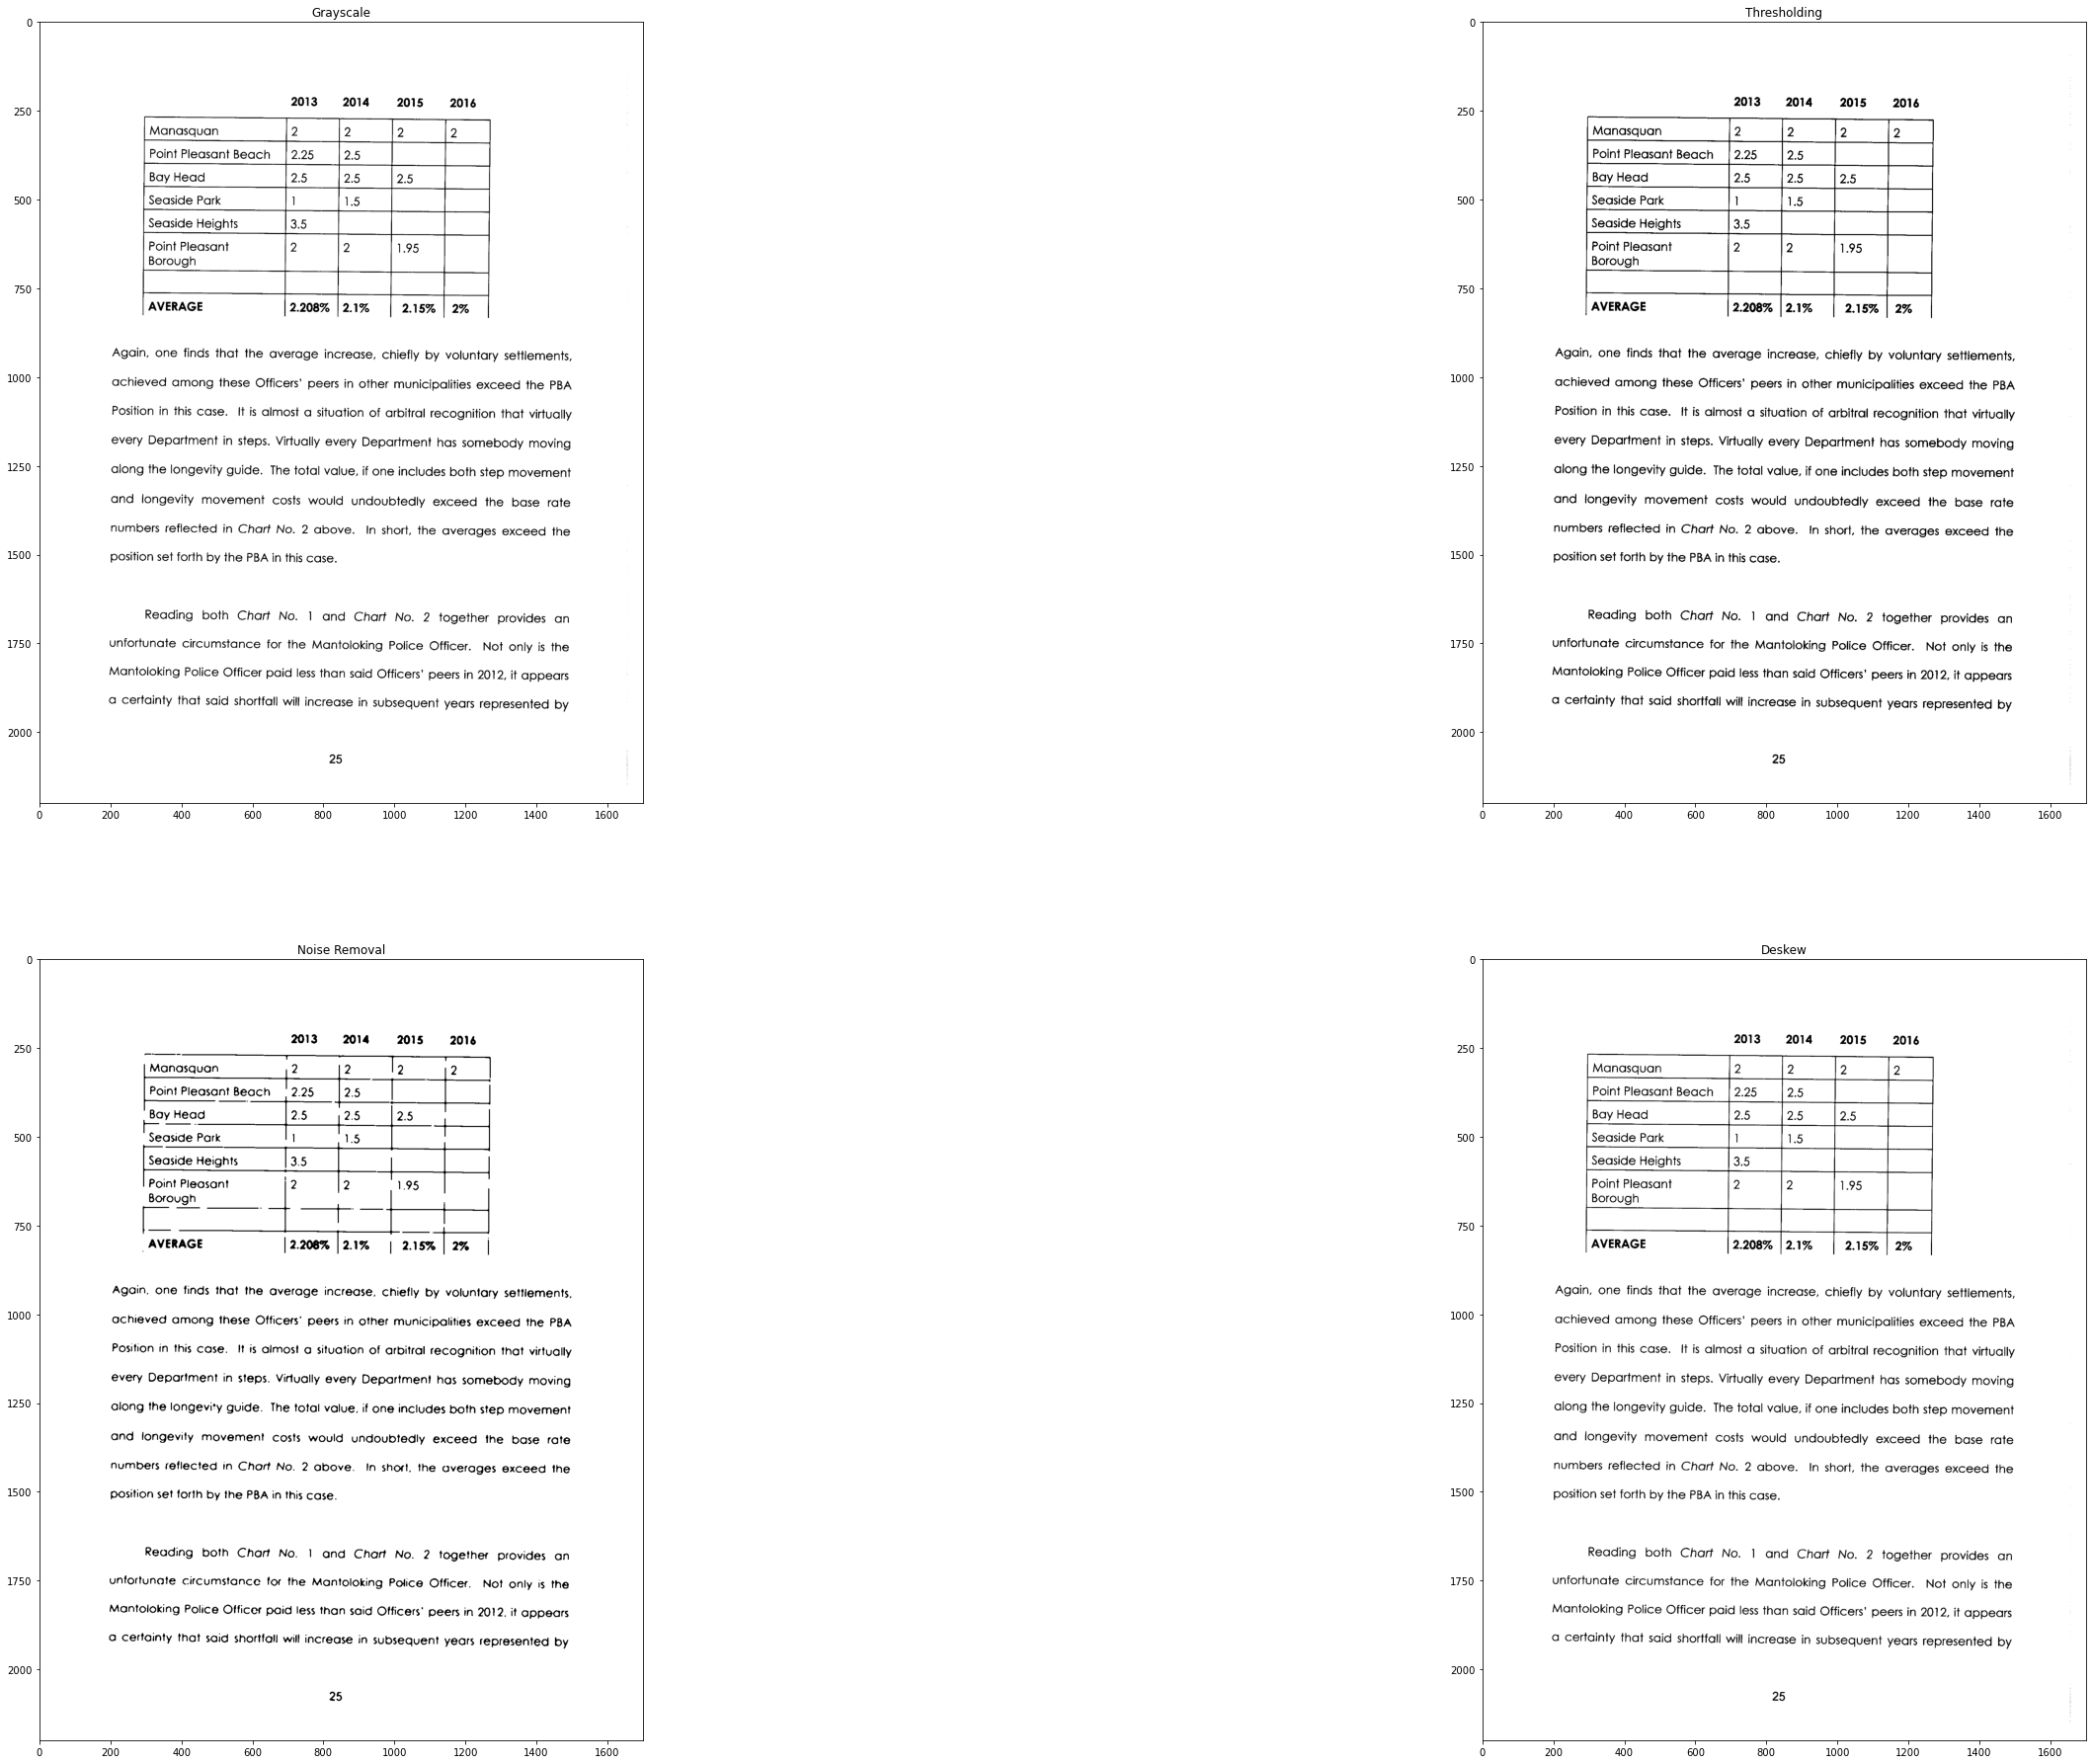

In [130]:
show_images(list(image_dict.values()), cols =2, titles = list(image_dict.keys()))

In [58]:
cv2.startWindowThread()
cv2.imshow('image', image_grayscale)

# wait forever, if Q is pressed then close cv image window
if cv2.waitKey(0) & 0xFF == ord('q'):
   cv2.destroyAllWindows()

In [131]:
for key, value in image_dict.items():
    text = pytesseract.image_to_string(value)
    print(key)
    print(text)

Grayscale
2013 2014 2015 2016

Manasquan

Point Pleasant Beach

Bay Head

Seaside Park

Seaside Heights

Point Pleasant
Borough

 

 

 

 

AVERAGE

Again, one finds that the average increase, chiefly by voluntary settlements,
achieved among these Officers’ peers in other municipalities exceed the PBA
Position in this case. it is almost a situation of arbitral recognition that virtually
every Department in steps. Virtually every Department has somebody moving
along the longevity guide. The total value, if one includes both step movement
and longevity movement costs would undoubtedly exceed the base rate
numbers reflected in Chart No. 2 above. In short, the averages exceed the

position set forth by the PBA in this case.

Reading both Chart No. 1 and Chart No. 2 together provides an
unfortunate circumstance for the Mantoloking Police Officer. Not only is the
Mantoloking Police Officer paid less than said Officers’ peers in 2012, it appears

a certainty that said shortfall will increase

In [132]:
text

'2013 2014 2015 2016\n\nManasquan\n\nPoint Pleasant Beach\n\nBay Head\n\nSeaside Park\n\nSeaside Heights\n\nPoint Pleasant\nBorough\n\n \n\n \n\n \n\n \n\nAVERAGE\n\nAgain, one finds that the average increase, chiefly by voluntary settlements,\nachieved among these Officers’ peers in other municipalities exceed the PBA\nPosition in this case. it is almost a situation of arbitral recognition that virtually\nevery Department in steps. Virtually every Department has somebody moving\nalong the longevity guide. The total value, if one includes both step movement\nand longevity movement costs would undoubtedly exceed the base rate\nnumbers reflected in Chart No. 2 above. In short, the averages exceed the\n\nposition set forth by the PBA in this case.\n\nReading both Chart No. 1 and Chart No. 2 together provides an\nunfortunate circumstance for the Mantoloking Police Officer. Not only is the\nMantoloking Police Officer paid less than said Officers’ peers in 2012, it appears\n\na certainty tha